 # <b> Predict Breast Cancer<b>


## 1. Importing Packages

In [6]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [7]:
#Viewing dataset
df = pd.read_csv('data/cancer.data', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 2. Exploratory Data Analysis

In [8]:
#Renaming columns

column_names = {0:'id number', 1:"Clump Thickness", 2:"Uniformity of Cell Size", 3:"Uniformity of Cell Shape", 4: "Marginal Adhesion", 5:"Single Epithelial Cell Size",
              6:"Bare Nuclei", 7:"Bland Chromatin", 8:"Normal Nucleoli", 9:"Mitosesi", 10:"Class"}
df = df.rename(columns=column_names)
df.head(1)

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosesi,Class
0,1000025,5,1,1,1,2,1,3,1,1,2


In [9]:
#Overview of the dataset
df.info

# Drop the ID and Class and convert the DataFrame to a NumPy array
df = df.drop(columns = df.columns[0], axis=1)
df.describe()
df.tail(1)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosesi,Class
698,4,8,8,5,4,5,10,4,1,4


In [10]:
#Inspecting the object values
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [11]:
# converting the non integer values to integers
df["Bare Nuclei"] = df["Bare Nuclei"].replace("?", 0) 
df["Bare Nuclei"] = df["Bare Nuclei"].astype("int64")


## 3. Feature selection

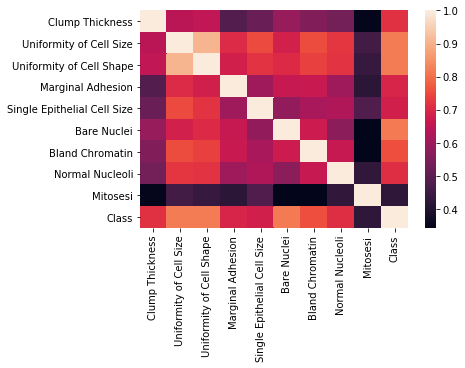

In [12]:
# Feature selection for model
sns.heatmap(df.corr())

In [13]:
df.corr()['Class']

Clump Thickness                0.716001
Uniformity of Cell Size        0.817904
Uniformity of Cell Shape       0.818934
Marginal Adhesion              0.696800
Single Epithelial Cell Size    0.682785
Bare Nuclei                    0.817653
Bland Chromatin                0.756616
Normal Nucleoli                0.712244
Mitosesi                       0.423170
Class                          1.000000
Name: Class, dtype: float64

In [14]:
# segregate features and lables into separate variables
X= df.drop(['Class'], axis=1)
y=df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [15]:
# Transforming the Features
X,y = df.drop('Class', axis = 1) , df['Class']

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [16]:
# Building a model

model = LogisticRegression()
model.fit(X_train,y_train)
predict_model = model.predict(X_test)

In [17]:
# Confussion matrix

labels = ['Benign', ' Malignant']

pd.DataFrame(data=confusion_matrix(y_test, predict_model), index=labels, columns=labels)

,Benign,Malignant
Benign,141,2
Malignant,5,62


In [17]:
#Adding constant column 
X1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X1).fit()
model.pvalues

C:\Users\Mc Camel RT .LAPTOP-6N3UDB08\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                          2.950962e-212
Clump Thickness                 2.791906e-18
Uniformity of Cell Size         5.462468e-04
Uniformity of Cell Shape        6.308670e-03
Marginal Adhesion               1.596158e-01
Single Epithelial Cell Size     1.713468e-01
Bare Nuclei                     9.192607e-42
Bland Chromatin                 4.296908e-05
Normal Nucleoli                 2.422993e-06
Mitosesi                        6.350910e-01
dtype: float64

## 4. Classification report

In [18]:
#Classification report

print(classification_report(y_test, predict_model))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       143
           4       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



# 5. Receiver Operating Characteristic (ROC)

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

logreg_roc_auc = roc_auc_score(y_test, predict_model)
fpr, tpr, threshold_log = roc_curve(y_test, predict_model)

plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

ValueError: y_true takes value in {2, 4} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.